## Relationship between Socio-Economic Factors (Education and Age) against Types of Products Purchased

In [15]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('Datasets/cleaned_customer.csv')
df

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,...,10,4,7,0,0,0,0,0,0,1
1,1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,...,1,2,5,0,0,0,0,0,0,0
2,2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,...,2,10,4,0,0,0,0,0,0,0
3,3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,...,0,4,6,0,0,0,0,0,0,0
4,4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,...,3,4,5,0,0,0,0,0,0,0
2212,2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,...,2,5,7,0,0,0,1,0,0,0
2213,2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,...,3,13,6,0,1,0,0,0,0,0
2214,2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,...,5,10,3,0,0,0,0,0,0,0


In [17]:
joint_response = pd.DataFrame(df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']])
joint_response

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,635,88,546,172,88,88
1,11,1,6,2,1,6
2,426,49,127,111,21,42
3,11,4,20,10,3,5
4,173,43,118,46,27,15
...,...,...,...,...,...,...
2211,709,43,182,42,118,247
2212,406,0,30,0,0,8
2213,908,48,217,32,12,24
2214,428,30,214,80,30,61


Looking through the data, we find many of them suitable to be used as predictor variables for our study. In this portion, we will be using socio-economic factors and their associated parameters as predictors for the types of products - wines, fruits, meat, fish, sweets and gold - purchased from the business.

As such, the chosen predictor variables are:
1. Education
2. Birth year (Age)

Our hypothesis is that those of a greater age and education level have a greater preference for more 'luxurious goods' such as wine, meat and gold as these factors are more likely to influence their income and hence propensity to spend on more 'valuable' items.

In [18]:
joint_predictor = pd.DataFrame(df[['Education', 'Year_Birth']])
joint_predictor

,Education,Year_Birth
0,Graduation,1957
1,Graduation,1954
2,Graduation,1965
3,Graduation,1984
4,PhD,1981
...,...,...
2211,Graduation,1967
2212,PhD,1946
2213,Graduation,1981
2214,Master,1956


In [19]:
jointplot= pd.concat([joint_predictor, joint_response], axis = 1).reindex(joint_predictor.index)
jointplot.describe(include='all')

,Education,Year_Birth,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,2216,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
unique,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Graduation,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1116,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1968.820397,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253
std,NaN,11.985554,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414
min,NaN,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,1959.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000
50%,NaN,1970.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000
75%,NaN,1977.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000


# Bi-variate Analysis: Education and Age as Predictor Variables
We will first plot the box and whiskers plot, barchart, joint plot and heatmap for these factors.

<Axes: xlabel='Year_Birth', ylabel='Count'>

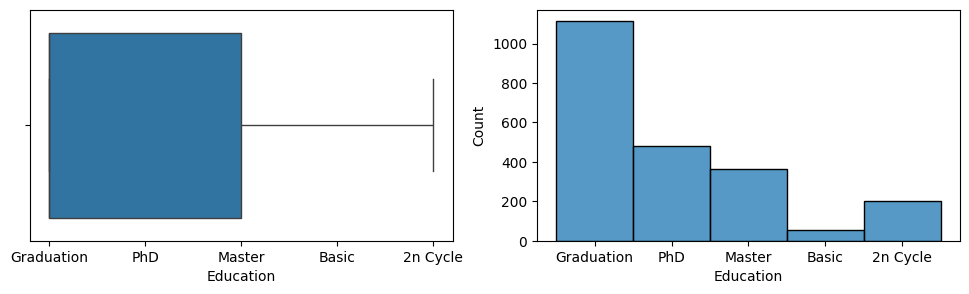

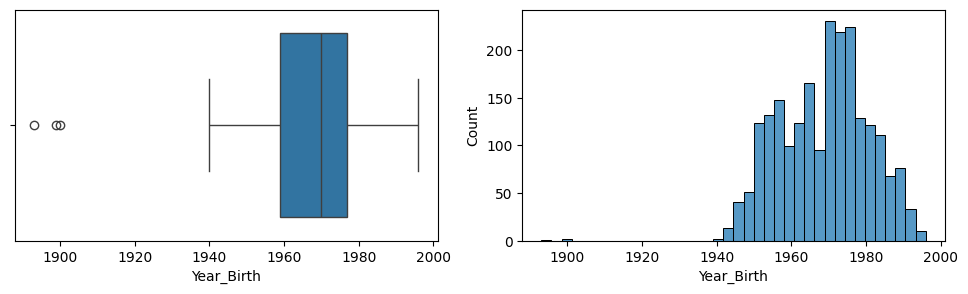

In [20]:
f, axes = plt.subplots(1, 2, figsize=(12, 3))

sb.boxplot(data = joint_predictor['Education'], orient = "h", ax = axes[0])
sb.histplot(data = joint_predictor['Education'], ax = axes[1])

f, axes = plt.subplots(1, 2, figsize=(12, 3))

sb.boxplot(data = joint_predictor['Year_Birth'], orient = "h", ax = axes[0])
sb.histplot(data = joint_predictor['Year_Birth'], ax = axes[1])

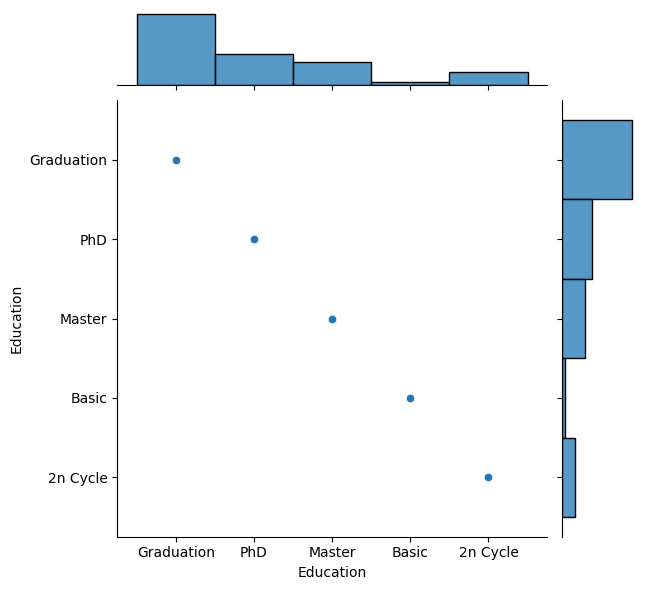

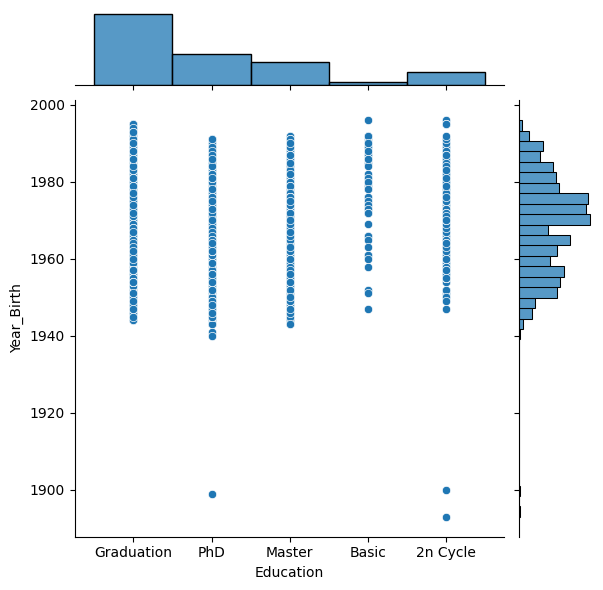

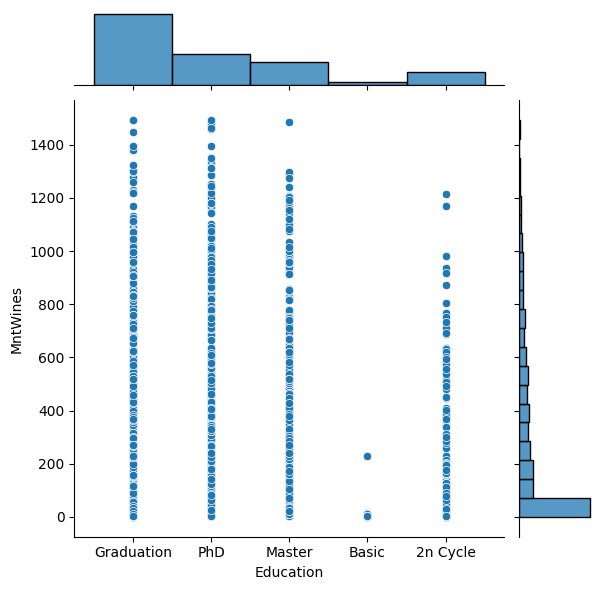

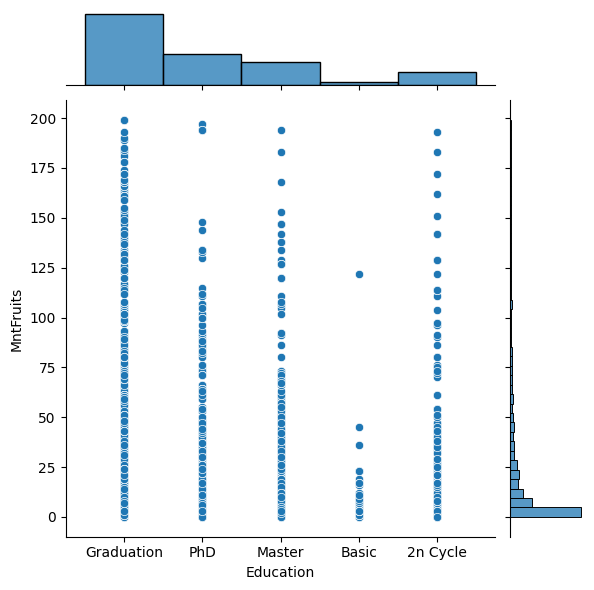

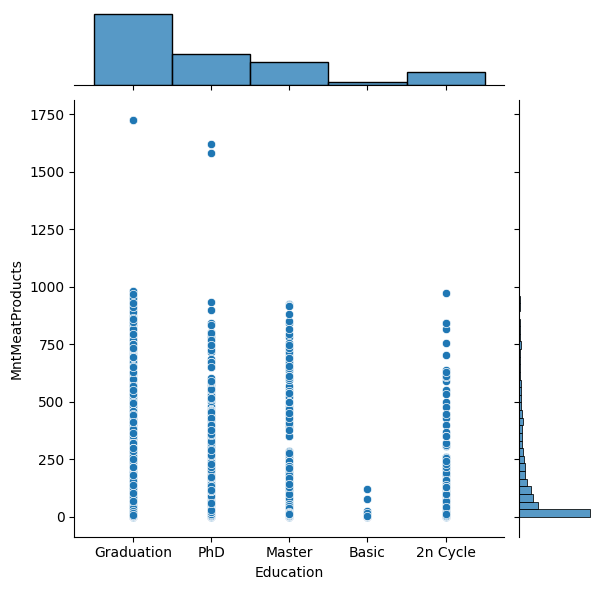

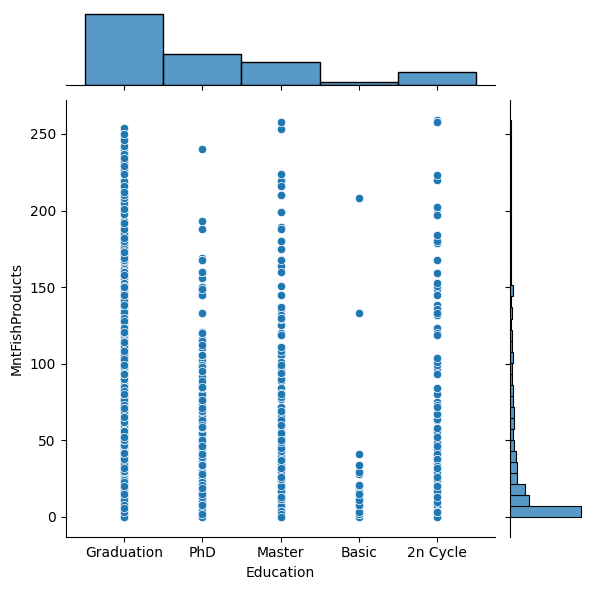

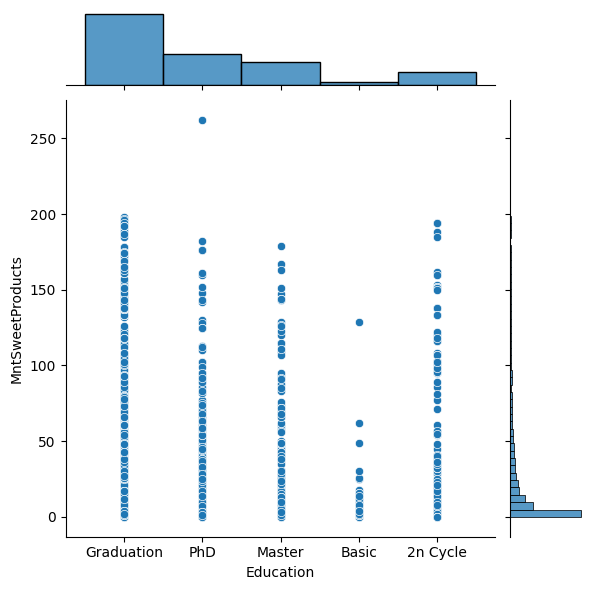

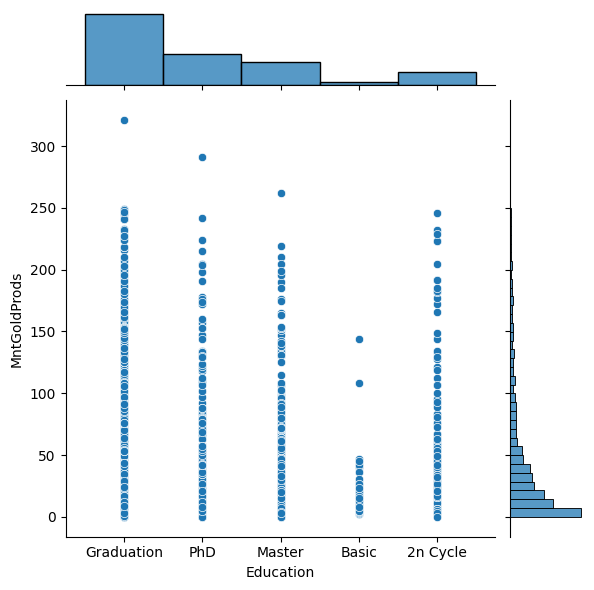

In [21]:
for var in jointplot:
    sb.jointplot(data = jointplot, x = "Education", y = var, height = 6)

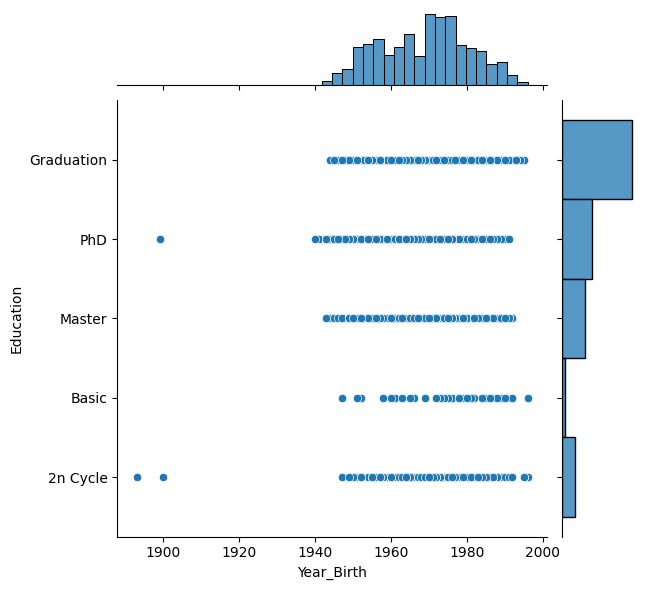

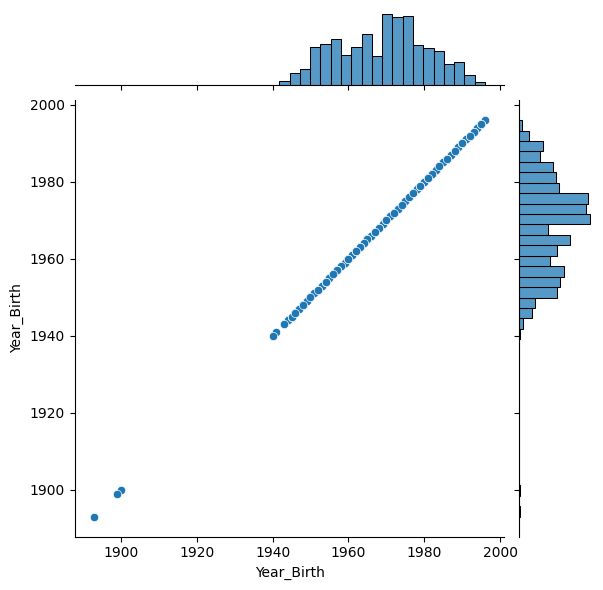

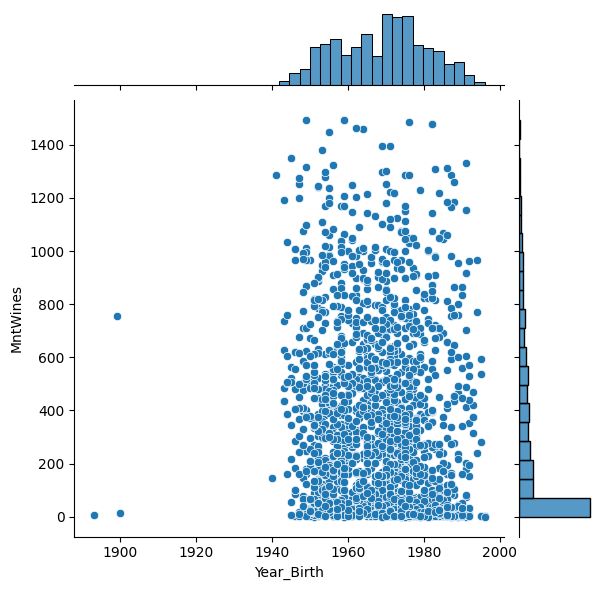

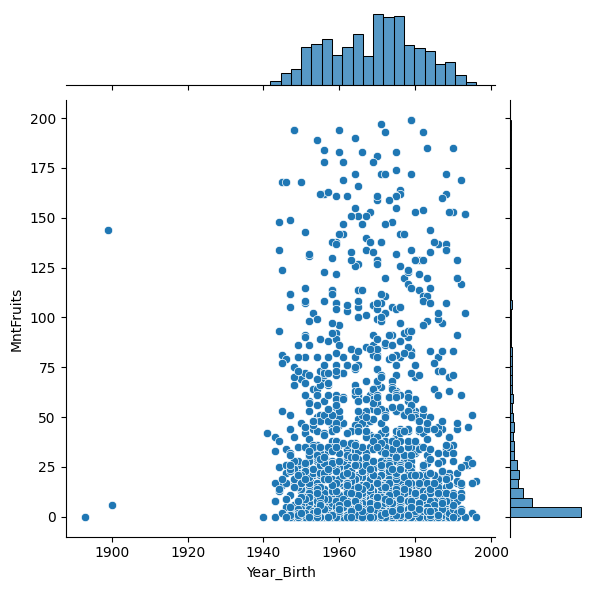

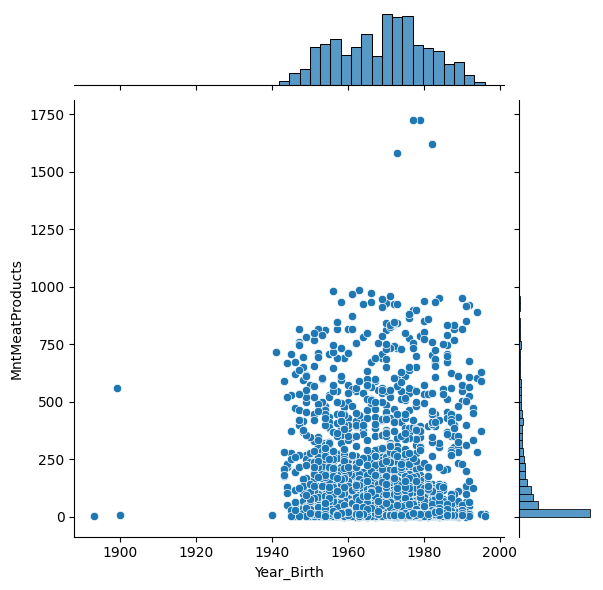

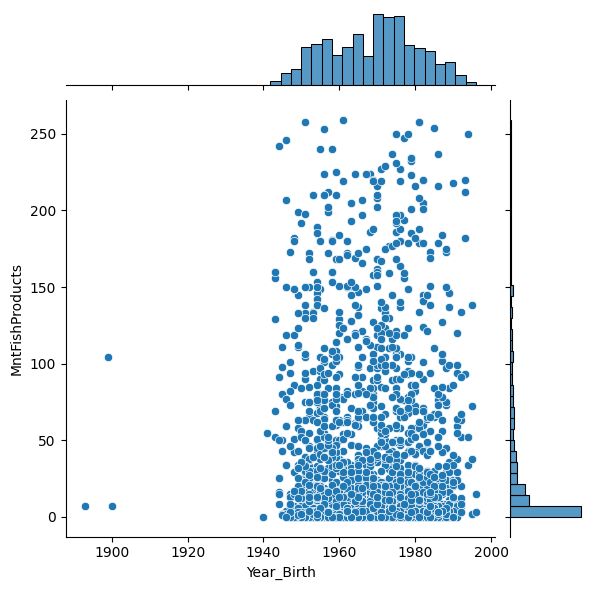

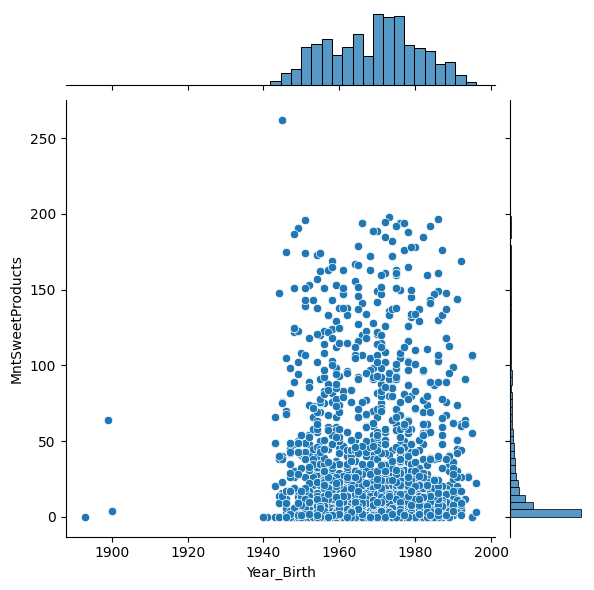

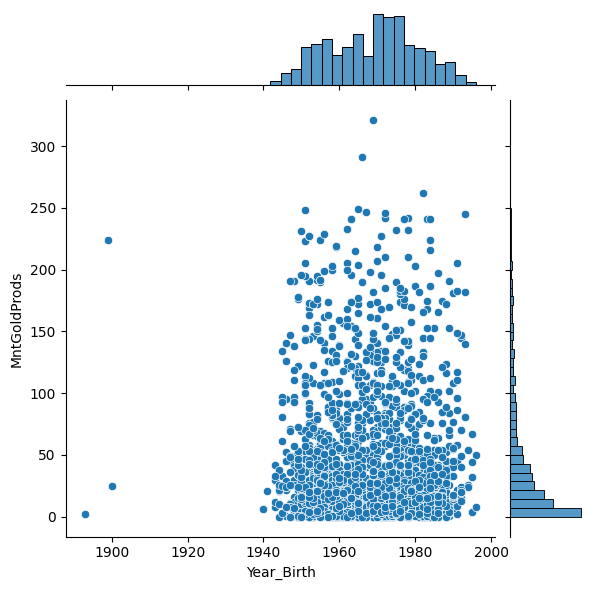

In [22]:
for var in jointplot:
    sb.jointplot(data = jointplot, x = "Year_Birth", y = var, height = 6)

As Education is a non-numeric factor, we need to encode it into numeric values using label encoding before a heatmap can be produced.

In [ ]:
jointplot['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [ ]:
jointplot_numeric=jointplot.copy()


,Education,Year_Birth,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,Graduation,1957,635,88,546,172,88,88
1,Graduation,1954,11,1,6,2,1,6
2,Graduation,1965,426,49,127,111,21,42
3,Graduation,1984,11,4,20,10,3,5
4,PhD,1981,173,43,118,46,27,15
...,...,...,...,...,...,...,...,...
2211,Graduation,1967,709,43,182,42,118,247
2212,PhD,1946,406,0,30,0,0,8
2213,Graduation,1981,908,48,217,32,12,24
2214,Master,1956,428,30,214,80,30,61


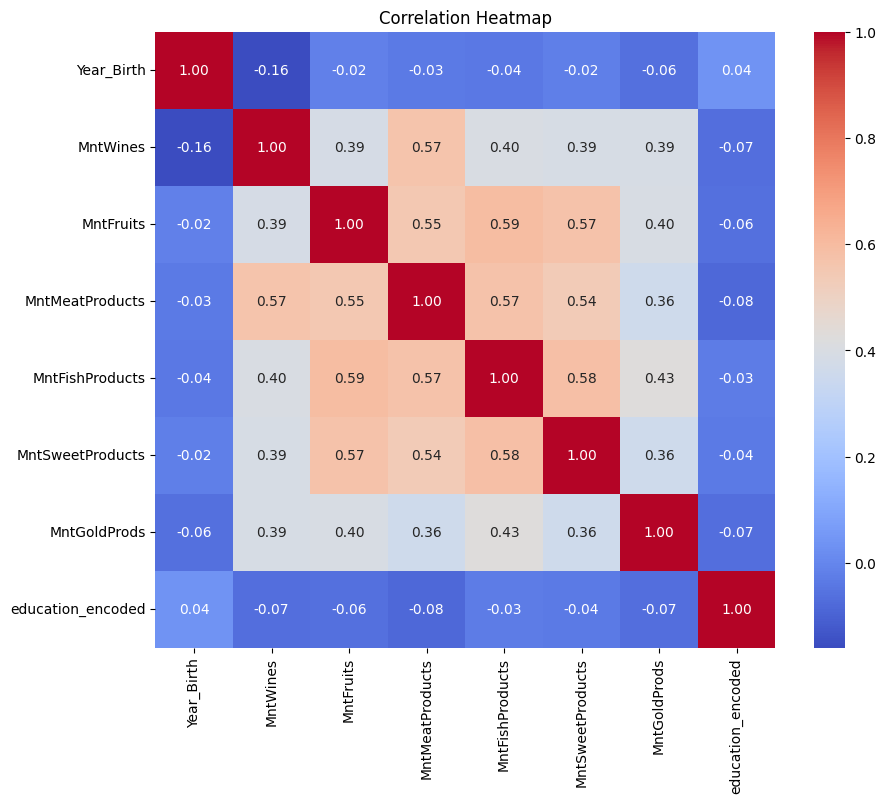

In [ ]:
education_mapping = {'Graduation': 0, 'PhD': 1, 'Master': 2, 'Basic': 3, '2n Cycle': 4}
jointplot_numeric['education_encoded'] = jointplot_numeric['Education'].map(education_mapping)

jointplot_numeric.drop('Education', axis=1, inplace=True)

# Create a correlation matrix
corr_matrix = jointplot_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# K_Means Clustering
UNDONE repeated 2d graphs to decide number of clusters then 3d graph to visualise for final chosen number of clusters

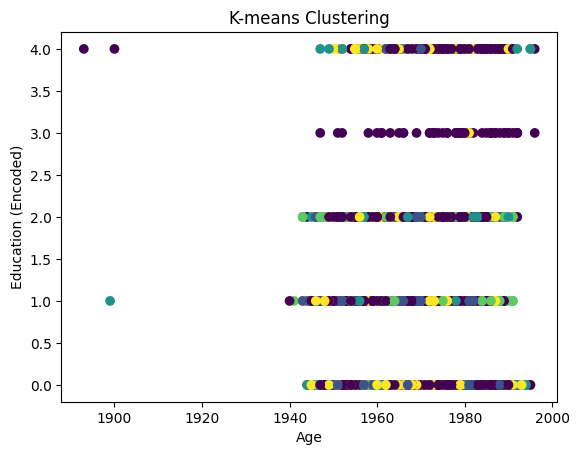

In [38]:
from sklearn.cluster import KMeans

# Scale the features if necessary (depends on the scale of your features)
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Choose the number of clusters (K)
k = 5

# Apply K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(jointplot_numeric)

# Add cluster labels to the original DataFrame
jointplot_numeric['cluster'] = kmeans.labels_

# Visualize the clusters
plt.scatter(jointplot_numeric['Year_Birth'], jointplot_numeric['education_encoded'], c=jointplot_numeric['cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Education (Encoded)')
plt.title('K-means Clustering')
plt.show()

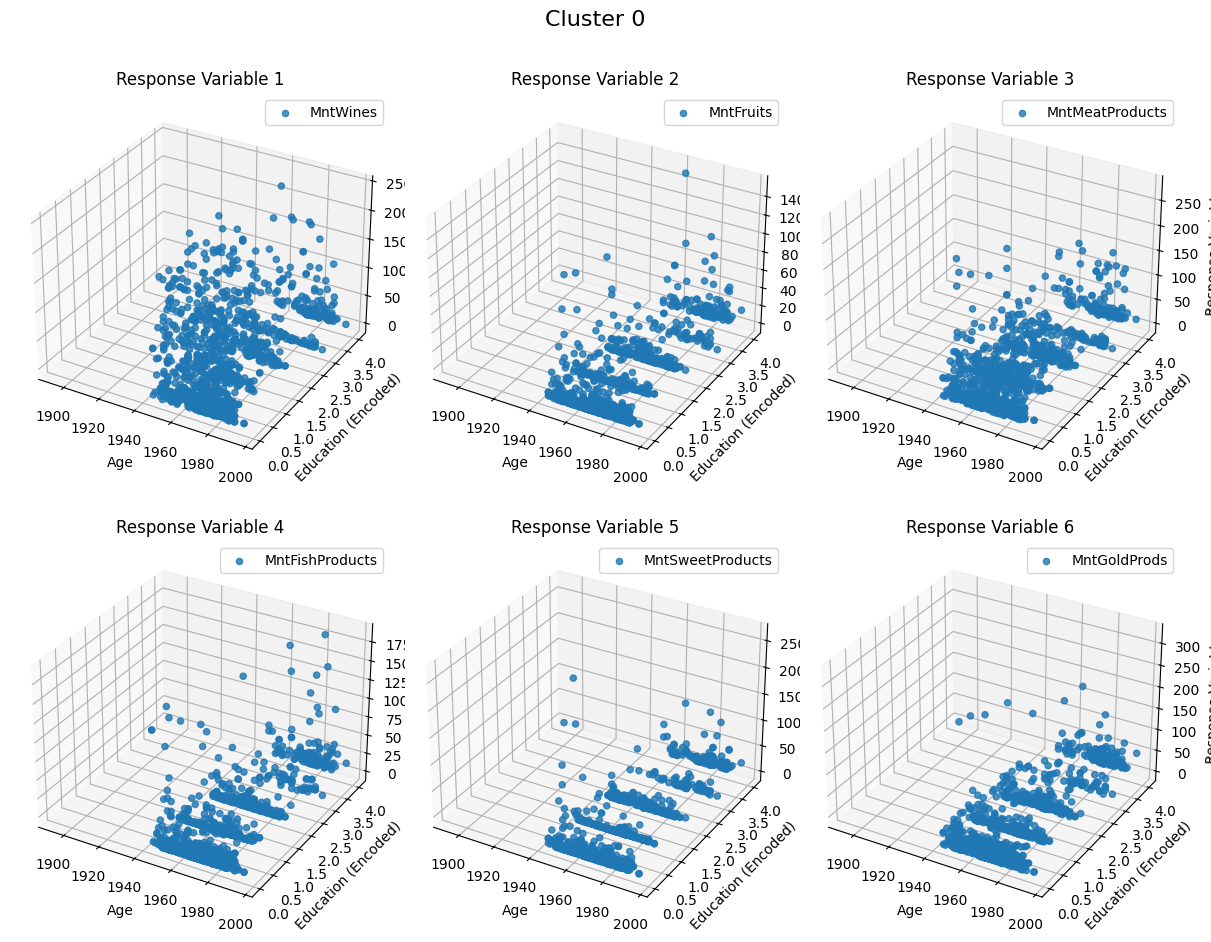

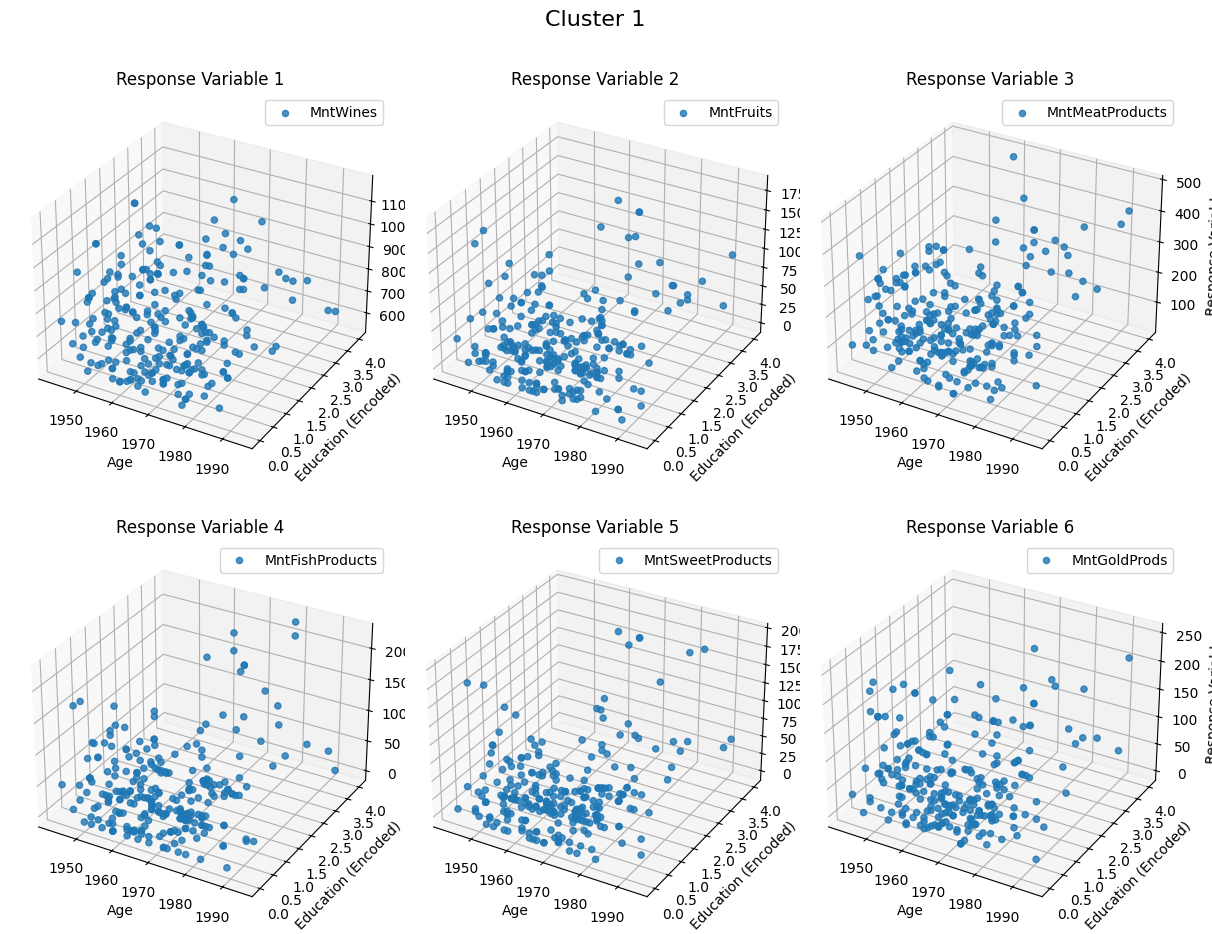

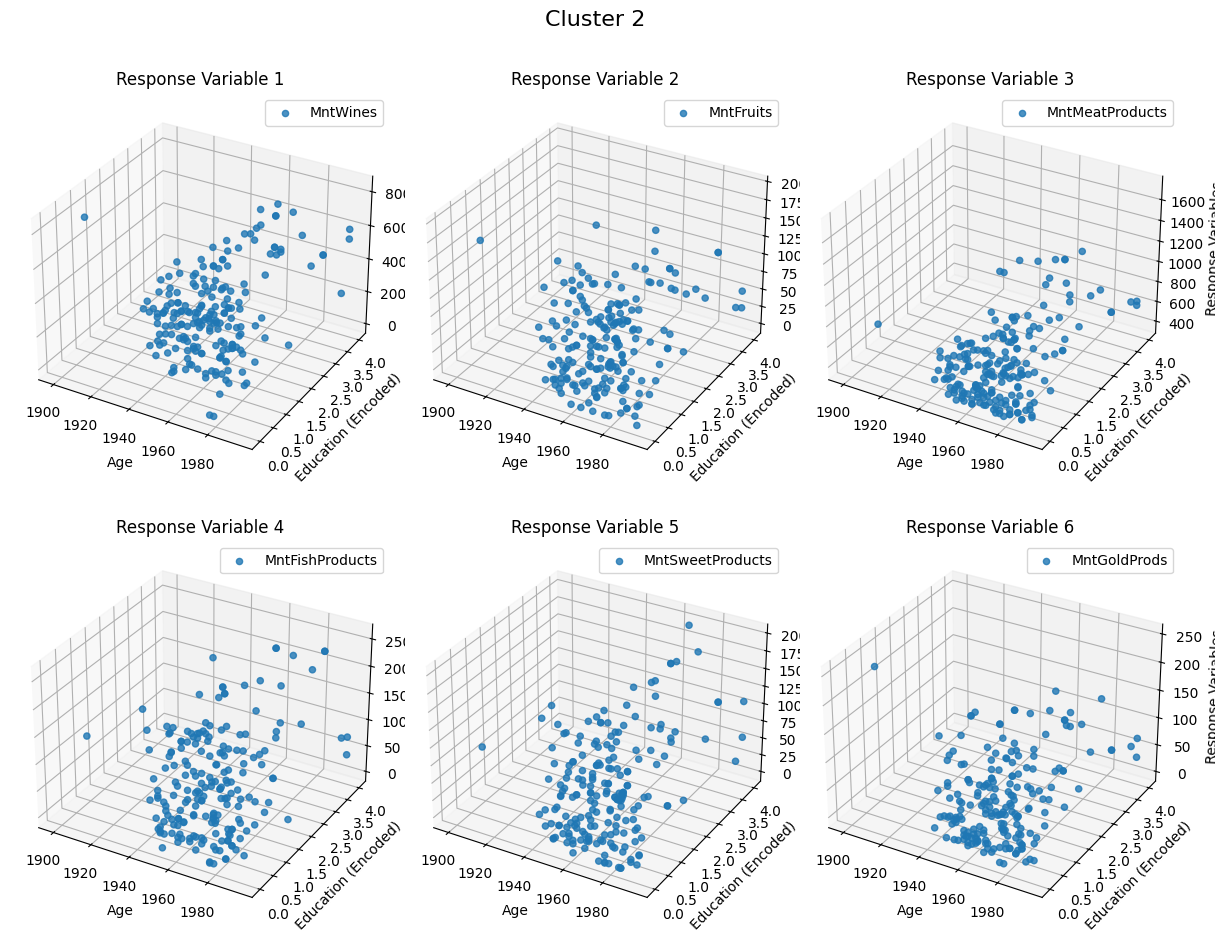

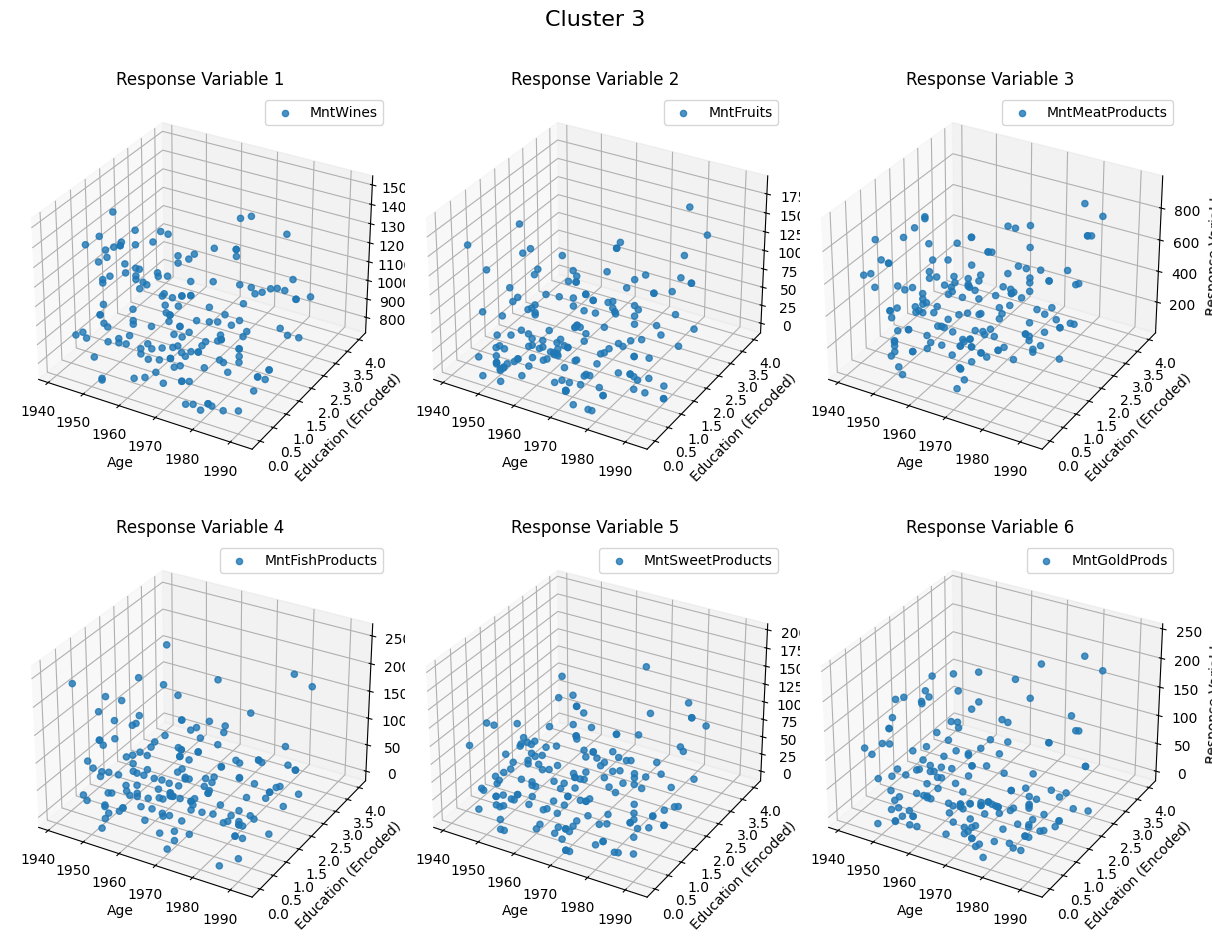

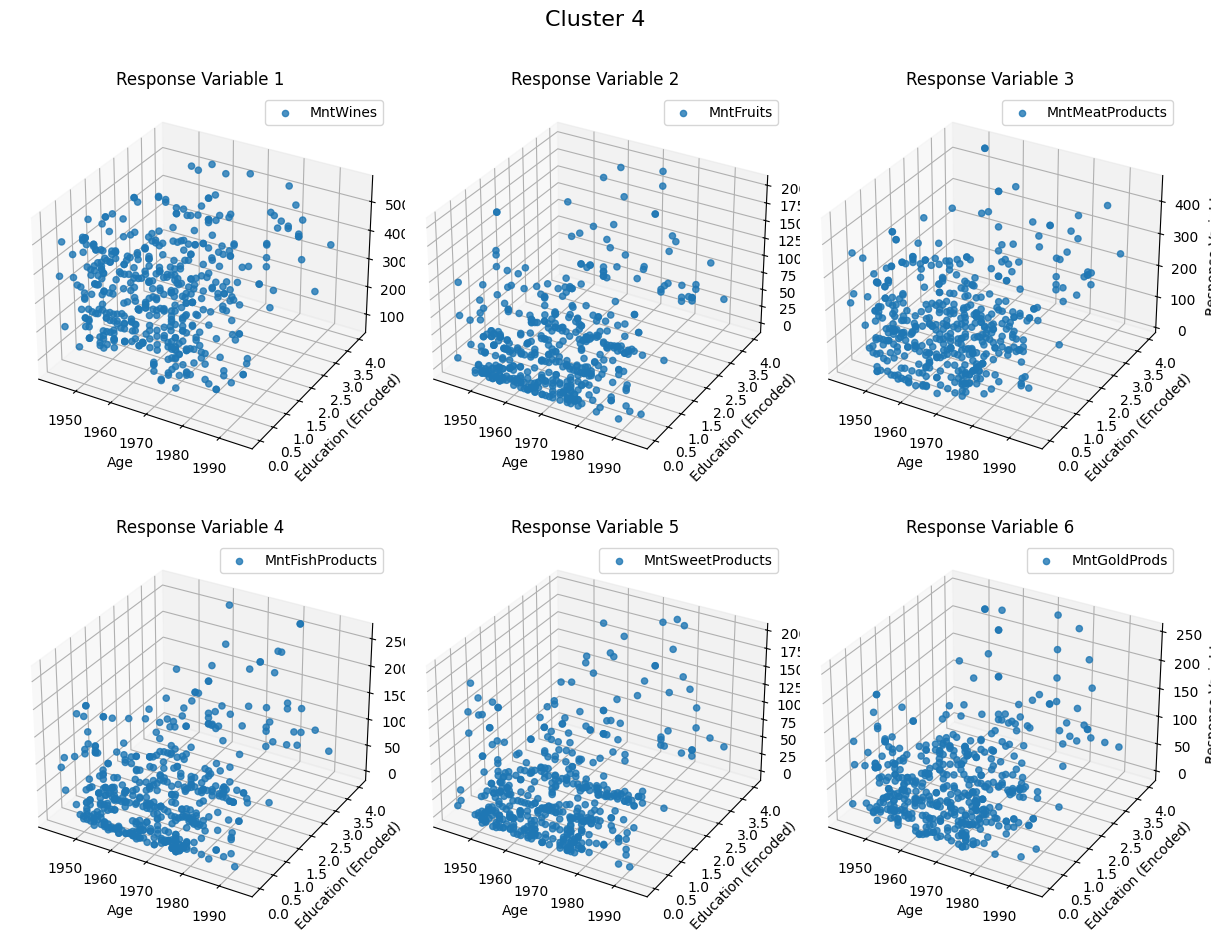

In [36]:
from mpl_toolkits.mplot3d import Axes3D

# Perform K-means clustering
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(jointplot_numeric)

# Add cluster labels to the original DataFrame
jointplot_numeric['cluster'] = kmeans.labels_

# Create a separate 3D plot for each cluster
for label in range(k):
    fig = plt.figure(figsize=(12, 10))
    fig.suptitle(f'Cluster {label}', fontsize=16)
    
    for i, response_var in enumerate(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']):
        ax = fig.add_subplot(2, 3, i+1, projection='3d')
        idx = jointplot_numeric['cluster'] == label
        ax.scatter(jointplot_numeric.loc[idx, 'Year_Birth'], jointplot_numeric.loc[idx, 'education_encoded'], jointplot_numeric.loc[idx, response_var], label=f'{response_var}', alpha=0.8)
        ax.set_xlabel('Age')
        ax.set_ylabel('Education (Encoded)')
        ax.set_zlabel('Response Variables')
        ax.set_title(f'Response Variable {i+1}')
        ax.legend()
    
    plt.tight_layout()
    plt.show()
